In [1]:
# setup
import os, sys
import pandas as pd
sys.path.append("/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/src")

from config.constants import GIT_DIRECTORY
from regression.model_evaluation_helpers import (
    pairwise_score_tests_for_task,
    pairwise_task_tests_for_scores,
    pairwise_model_tests_for_task_target
)
from regression.plotting_helpers import plot_bootstrap_score_boxplot_pvals, plot_models_box_with_pvals, plot_bootstrap_model_box, plot_bootstrap_task_boxplot_pvals_across_scores, plot_bootstrap_score_boxplot_pvals_all_tasks

oof_dir = os.path.join(GIT_DIRECTORY, "results", "regression", "oof_results")
oof_all = pd.read_csv(os.path.join(oof_dir, "oof_preds_all_scores.csv"))
results_dir = os.path.join(GIT_DIRECTORY, "results", "regression")

In [2]:
# inputs
model = "full"
task  = "picnicScene"
score_order = ["PictureNamingScore","SemanticFluencyScore","PhonemicFluencyScore"]
task_order  = ["picnicScene","cookieTheft","journaling"]
model_order = ["baseline","demographics","acoustic","linguistic","linguistic+acoustic","full"]
n_boot = 1000
random_state = 42

In [3]:
# compute score comparisons

score_path = os.path.join(results_dir, "score_comparison")
os.makedirs(score_path, exist_ok=True)

score_tests = pairwise_score_tests_for_task(
    oof_preds=oof_all,
    task="picnicScene",
    model="full",
    targets=score_order,
    n_boot=n_boot,
    adjust="holm",
    random_state=random_state
)
score_tests.to_csv(os.path.join(score_path, "pairwise_scores_full_picnicScene.csv"), index=False)

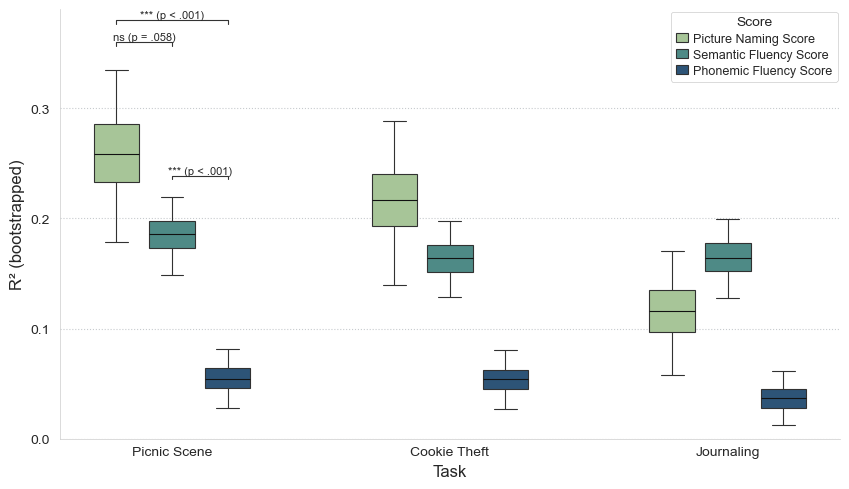

In [4]:
# plot with p-values drawn above picnicScene boxes (tasks as hues, scores on x-axis)
score_tests_plot = plot_bootstrap_score_boxplot_pvals(
    oof_preds=oof_all,
    model=model,
    task_to_annotate=task,
    n_boot=n_boot,
    order_scores=score_order,
    order_tasks=task_order,
    adjust="holm",
    save_path=score_path
)

In [5]:
# compute task comparisons

task_path = os.path.join(results_dir, "task_comparison")
os.makedirs(task_path, exist_ok=True)

task_tests = pairwise_task_tests_for_scores(
    oof_all,
    scores=("PictureNamingScore","SemanticFluencyScore"),
    tasks=tuple(task_order),
    model="full",
    n_boot=n_boot,
    adjust="holm",
    random_state=random_state
)
task_tests.to_csv(os.path.join(task_path, "pairwise_tasks_full_two_scores.csv"), index=False)

In [6]:
# compute model comparisons

model_path = os.path.join(results_dir, "model_comparison")
os.makedirs(model_path, exist_ok=True)

model_tests = pairwise_model_tests_for_task_target(
    oof_all,
    task="picnicScene",
    target="SemanticFluencyScore",
    models=model_order,
    n_boot=n_boot,
    adjust="holm",
    random_state=random_state
)
model_tests.to_csv(os.path.join(model_path, "pairwise_models_picnicScene_Semantic.csv"), index=False)


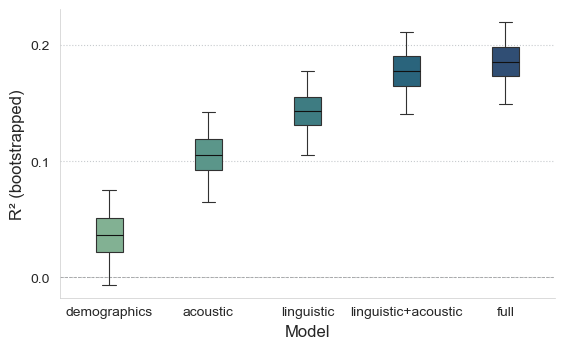

In [7]:
model_tests = pd.read_csv(os.path.join(model_path, "pairwise_models_picnicScene_Semantic.csv"))
model_order = ["baseline","demographics","acoustic","linguistic","linguistic+acoustic","full"]

plot_models_box_with_pvals(
    oof_all,
    target="SemanticFluencyScore",
    task="picnicScene",
    order_models=model_order[1:],
    pairs_to_show=[("demographic", "acoustic"),("demographic", "linguistic")],
    bracket_gap=0.05,
    tests_df=model_tests,
    save_path=model_path
)

In [8]:
# add full score-task-model plot (without statistical comparisons)

# target = "PictureNamingScore"
# oof_target = oof_all[oof_all["target"] == target].copy()
# subject_set = set(pd.read_csv(os.path.join(oof_dir, f"{target}_full_subjects.csv"))["Subject_ID"])

# plot_bootstrap_model_box(
#     oof_target,
#     target=target,
#     order_models=model_order[1:],
#     order_tasks=task_order,
#     subject_set=subject_set,
#     save_path=model_path
# )


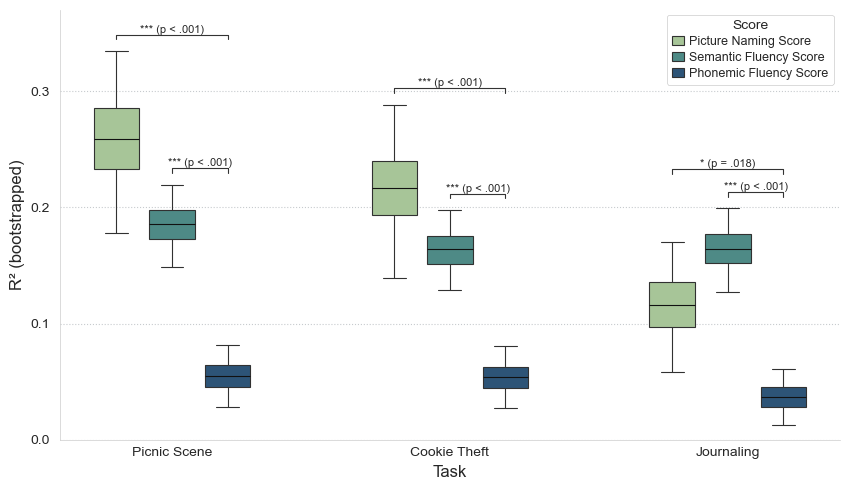

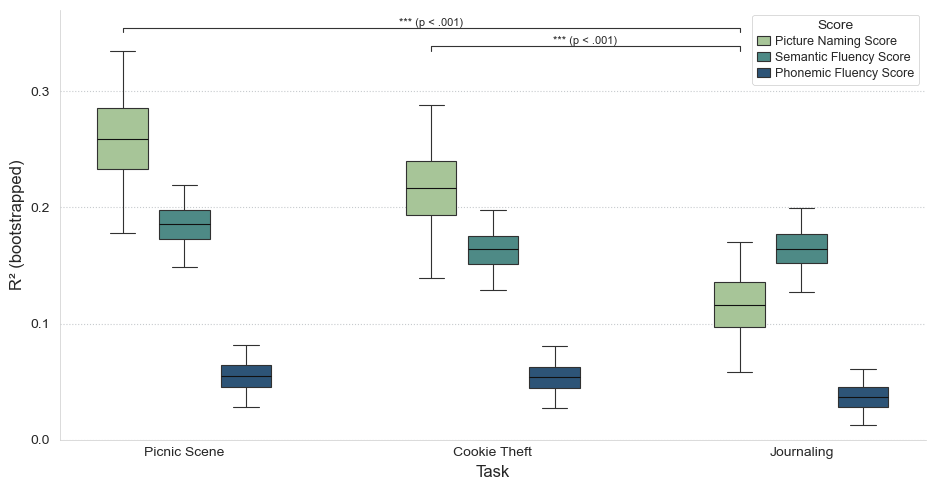

In [11]:
# add different p-values for presentation

# score comparisons – all tasks, only sig brackets
plot_bootstrap_score_boxplot_pvals_all_tasks(
    oof_preds=oof_all,
    model=model,
    n_boot=n_boot,
    order_scores=score_order,
    order_tasks=task_order,
    adjust="holm",
    alpha=0.05,
    save_path=score_path,
)

# task comparisons – only PN brackets across tasks:
plot_bootstrap_task_boxplot_pvals_across_scores(
    oof_preds=oof_all,
    model=model,
    n_boot=n_boot,
    order_scores=score_order,
    order_tasks=task_order,
    adjust="holm",
    alpha=0.05,
    score_for_brackets="PictureNamingScore",
    save_path=task_path,
)
